In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Data Preparation

In [2]:
races = pd.read_csv("../data/races.csv")
runs = pd.read_csv("../data/runs_result_class.csv")

In [3]:
races.head()

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,...,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,...,4.0,NaN,12.5,47.0,33.5,NaN,5,23.5,NaN,NaN
2,2,1997-06-02,ST,3,A,0,1400,GOOD TO FIRM,60-40,625000.0,...,13.0,NaN,23.0,23.0,59.5,NaN,11,70.0,NaN,NaN
3,3,1997-06-02,ST,4,A,0,1200,GOOD TO FIRM,120-95,1750000.0,...,10.0,NaN,14.0,24.5,16.0,NaN,5,52.0,NaN,NaN
4,4,1997-06-02,ST,5,A,0,1600,GOOD TO FIRM,60-40,625000.0,...,1.0,NaN,15.5,28.0,17.5,NaN,2,36.5,NaN,NaN


In [4]:
races_data = races[['race_id', 'venue', 'config', 'surface', 'distance']]
runs_data = runs[['race_id', 'result_classes','result', 'horse_age', 'declared_weightn', 'actual_weightn', 'draw']]

In [5]:
#Convert the Result to Three Groups (1-4, 5-9, >9)
conditions = [
    (runs_data['result'] < 5),
    (runs_data['result'] >= 5) & (runs_data['result'] <= 9),
    (runs_data['result'] > 9)
    ]

values = ['1', '2', '3']
runs_data['result_class'] = np.select(conditions, values)
# display updated DataFrame
runs_data2=runs_data
print(runs_data2[['result', 'result_class']])

       result result_class
0          10            3
1           8            2
2           7            2
3           9            2
4           6            2
...       ...          ...
79442       6            2
79443       7            2
79444      10            3
79445       8            2
79446      11            3

[79447 rows x 2 columns]


<ipython-input-5-e56b08d178ec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_data['result_class'] = np.select(conditions, values)


In [6]:
df = pd.merge(runs_data2, races_data)
df.head()

,race_id,result_classes,result,horse_age,declared_weightn,actual_weightn,draw,result_class,venue,config,surface,distance
0,0,3,10,3,1220.0,113,7,3,ST,A,0,1400
1,0,2,8,3,1080.0,123,12,2,ST,A,0,1400
2,0,2,7,3,1182.0,122,8,2,ST,A,0,1400
3,0,2,9,3,1218.0,117,13,2,ST,A,0,1400
4,0,2,6,3,1072.0,121,14,2,ST,A,0,1400


In [7]:
df.shape

(79447, 12)

In [8]:
df = df.dropna()
df.shape

(79447, 12)

In [9]:
df.columns

Index(['race_id', 'result_classes', 'result', 'horse_age', 'declared_weightn',
       'actual_weightn', 'draw', 'result_class', 'venue', 'config', 'surface',
       'distance'],
      dtype='object')

In [10]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,race_id,result_classes,result,horse_age,declared_weightn,actual_weightn,draw,surface,distance,result_class_2,result_class_3,venue_ST,config_A+3,config_B,config_B+2,config_C,config_C+3
0,0,3,10,3,1220.0,113,7,0,1400,0,1,1,0,0,0,0,0
1,0,2,8,3,1080.0,123,12,0,1400,1,0,1,0,0,0,0,0
2,0,2,7,3,1182.0,122,8,0,1400,1,0,1,0,0,0,0,0
3,0,2,9,3,1218.0,117,13,0,1400,1,0,1,0,0,0,0,0
4,0,2,6,3,1072.0,121,14,0,1400,1,0,1,0,0,0,0,0


In [11]:
df.columns

Index(['race_id', 'result_classes', 'result', 'horse_age', 'declared_weightn',
       'actual_weightn', 'draw', 'surface', 'distance', 'result_class_2',
       'result_class_3', 'venue_ST', 'config_A+3', 'config_B', 'config_B+2',
       'config_C', 'config_C+3'],
      dtype='object')

In [12]:
new_data = df.drop(columns=['race_id', 'result', 'result_class_2', 'result_class_3']) # drop the unnecessary column
new_data

,result_classes,horse_age,declared_weightn,actual_weightn,draw,surface,distance,venue_ST,config_A+3,config_B,config_B+2,config_C,config_C+3
0,3,3,1220.0,113,7,0,1400,1,0,0,0,0,0
1,2,3,1080.0,123,12,0,1400,1,0,0,0,0,0
2,2,3,1182.0,122,8,0,1400,1,0,0,0,0,0
3,2,3,1218.0,117,13,0,1400,1,0,0,0,0,0
4,2,3,1072.0,121,14,0,1400,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79442,2,5,1291.0,112,6,0,1600,1,0,0,0,0,0
79443,2,5,1170.0,109,4,0,1600,1,0,0,0,0,0
79444,3,5,1348.0,100,1,0,1600,1,0,0,0,0,0
79445,2,3,1366.0,109,12,0,1600,1,0,0,0,0,0


In [13]:
#Train the 'result_classes' elements
X = new_data.drop(columns='result_classes')
y = new_data['result_classes']
# extermely skewed data
y.value_counts()

2    31494
1    25433
3    22520
Name: result_classes, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train[0])
print(X_test[0])

[-0.38706817  0.01364819 -0.73445033  0.02757531 -0.34829656 -0.07019072
  0.72941602 -0.31788335 -0.37664141 -0.33229217  2.12963839 -0.43038846]
[ 0.77985506 -1.66995091  1.71048188 -1.54066187 -0.35439139 -1.50787008
 -1.38811894 -0.32464027  2.71513729 -0.33449754 -0.47687121 -0.42592563]


# Modeling

In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
n_hidden_1 = 64 
n_hidden_2 = 64 
n_input = 12 
n_classes = 1 
training_epochs = 30
batch_size = 10 

In [22]:
#Activation of relu to build model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=n_input))
model.add(Dense(64, activation='relu'))
model.add(Dense(1)) 

In [23]:
import keras.backend as K
def r2(y_true, y_pred):
    a = K.square(y_pred - y_true)
    b = K.sum(a)
    c = K.mean(y_true)
    d = K.square(y_true - c)
    e = K.sum(d)
    f = 1 - b/e
    return f

In [24]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae',r2])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=training_epochs)

pred_test_y = model.predict(X_test[:10])
print(pred_test_y)

Epoch 1/30
6356/6356 [==============================] - 4s 546us/step - loss: 0.1480 - mae: 0.2554 - r2: -inf
Epoch 2/30
6356/6356 [==============================] - 3s 527us/step - loss: 0.0693 - mae: 0.1673 - r2: 0.8531
Epoch 3/30
6356/6356 [==============================] - 3s 522us/step - loss: 0.0652 - mae: 0.1507 - r2: 0.8662
Epoch 4/30
6356/6356 [==============================] - 3s 515us/step - loss: 0.0642 - mae: 0.1476 - r2: 0.8633
Epoch 5/30
6356/6356 [==============================] - 3s 506us/step - loss: 0.0644 - mae: 0.1454 - r2: 0.8650
Epoch 6/30
6356/6356 [==============================] - 3s 499us/step - loss: 0.0640 - mae: 0.1444 - r2: 0.8651
Epoch 7/30
6356/6356 [==============================] - 3s 527us/step - loss: 0.0625 - mae: 0.1418 - r2: 0.8685
Epoch 8/30
6356/6356 [==============================] - 3s 534us/step - loss: 0.0625 - mae: 0.1411 - r2: -inf
Epoch 9/30
6356/6356 [==============================] - 3s 532us/step - loss: 0.0639 - mae: 0.1416 - r2: -in

In [25]:
# 5. Prediction
predictions = model.predict(X_test[:10])
predictions = predictions.reshape(-1,)

# Check our predictions against the ground truths.
actual_predict = pd.DataFrame({
    'Predicted result class': predictions,
    'Actual result class': y_test[:10]
})
actual_predict

,Predicted result class,Actual result class
78296,1.011145,1
42401,0.953943,1
29082,2.089718,2
48760,2.249506,2
25380,0.991908,1
25640,2.967864,3
52526,2.769493,3
18555,3.002366,3
44590,2.140178,2
60932,2.186263,2


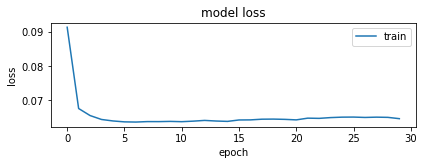

In [27]:
# plotting the metrics

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')

plt.tight_layout()

In [28]:
# 4. Evaluate the model.
model.evaluate(
  X_test,
  y_test
)

497/497 [==============================] - 0s 456us/step - loss: 0.0726 - mae: 0.1592 - r2: 0.8696


[0.07262443751096725, 0.1592145562171936, 0.8695651292800903]